In [38]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Load the dataset
turbine_dataset = pd.read_csv("A1-turbine.txt", sep='\t', header=0)
x = turbine_dataset[['#height_over_sea_level', 'fall', 'net_fall', 'flow']] 
y = turbine_dataset[["power_of_hydroelectrical_turbine"]]
#Scale the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.15, shuffle=True)


Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 0.0438 - mae: 0.1562 - val_loss: 0.0213 - val_mae: 0.1151
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0124 - mae: 0.0870 - val_loss: 0.0066 - val_mae: 0.0625
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0062 - mae: 0.0608 - val_loss: 0.0048 - val_mae: 0.0533
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0465 - val_loss: 0.0033 - val_mae: 0.0426
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0379 - val_loss: 0.0019 - val_mae: 0.0353
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0280 - val_loss: 9.6438e-04 - val_mae: 0.0253
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 7.9371e-04 - mae: 0.0217 - val_loss: 4.3492e-04 - val_mae: 0.0143
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - los

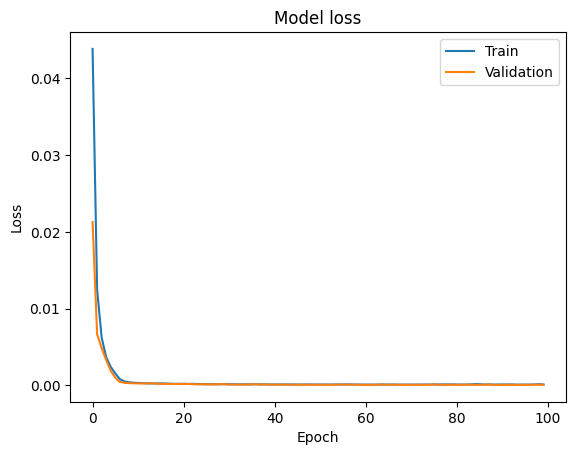

In [30]:
# Part 2: Implementation of NN
import tensorflow as tf
from matplotlib import pyplot as plt

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])
sgd = tf.keras.optimizers.Adam(learning_rate=0.005, ema_momentum=0.005)
model.compile(loss='mse', metrics=['mae'],optimizer=sgd)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


12/12 [==============================] - 0s 1ms/step
---Test---
R2 Score:  0.9990876036274231
MSE:  4.950498717619707e-05
MAE:  0.005490286305501366
---Train---
R2 Score:  0.99865529771255
MSE:  8.622306131254806e-05
MAE:  0.005278777695058692

MAPE:  0.039000538773277804


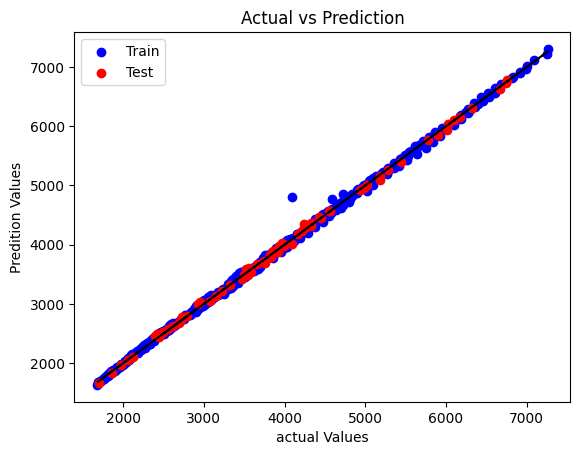

In [39]:
from sklearn.metrics import *
from matplotlib import pyplot as plt


# Part 3: Obtaining predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", label="Train")
plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()